# **Wine Quality Prediction**

**About Dataset**:

The datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.These datasets can be viewed as classification or regression tasks.


**Target:**

To Predict Wine Quality

**Approach:**

In this notebook,I have done some exploration on the data using matplotlib and seaborn. Then, I've used different classifier models to predict the quality of the wine.

1. Random Forest Classifier

2. Stochastic Gradient Descent Classifier

3. Support Vector Classifier(SVC)

Then I use Grid Search technique to optimize the model performance.


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Importing Data**

In [ ]:
wine=pd.read_csv('/content/drive/My Drive/ML Projects datasets/Wine Quality Prediction/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Exploratory Data Analysis**

In [ ]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


So it's clear there're no null values

# **Data Visualisation**

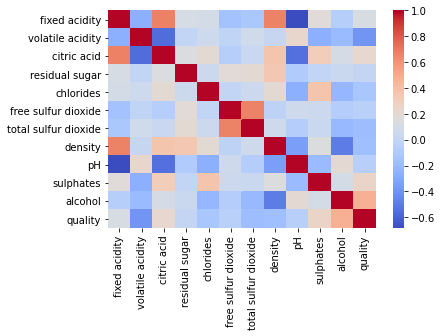

In [ ]:
#creating correlation matrix
g=sns.heatmap(wine.corr(), annot=False, fmt="0.2f",cmap="coolwarm") 

* high alcohol means high quality
* low volatile acidity means high quality

let's see relationship of quality with alcohol,volatile acidity,PH,density,citric acid

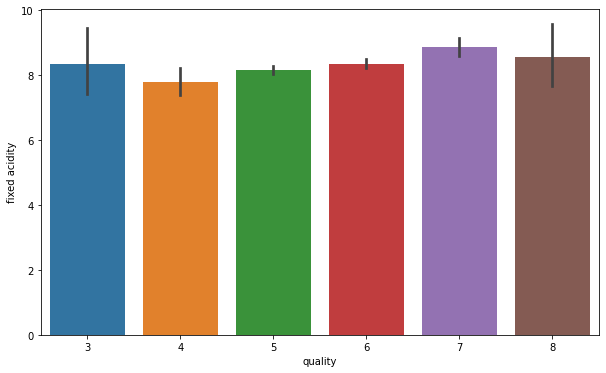

In [ ]:
#Here we see that generic trend of fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

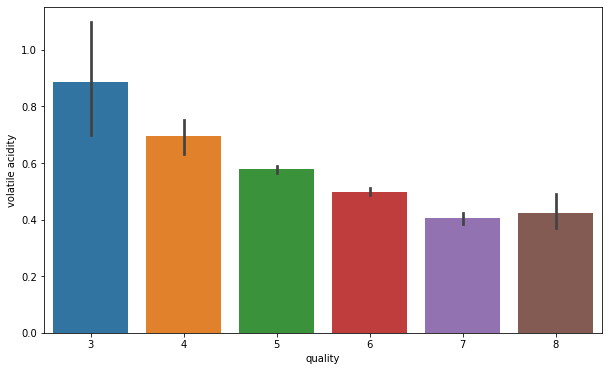

In [ ]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

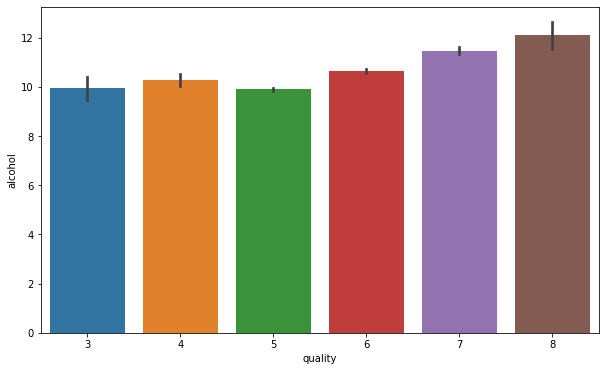

In [ ]:
#Here we see it's quite a rising trend in alcohol with quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

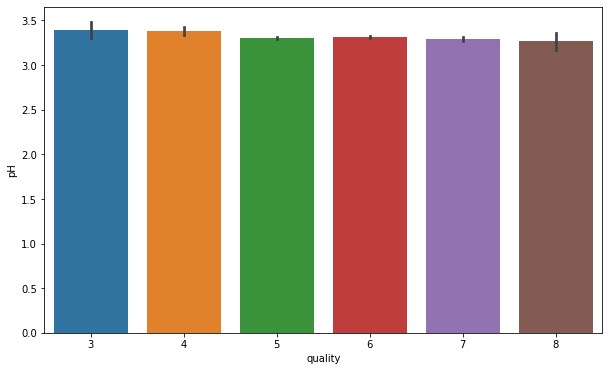

In [ ]:
#Here we see that generic trend of pH does not give any specification to classify the quality. 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine)

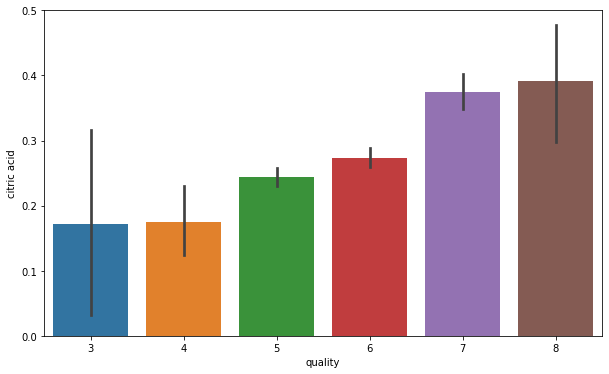

In [ ]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

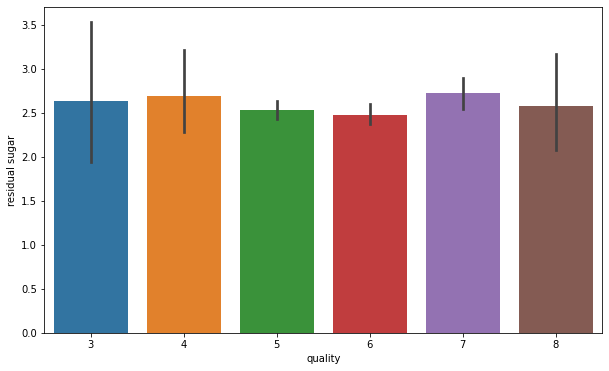

In [ ]:
#Here we see that generic trend of residual sugar does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

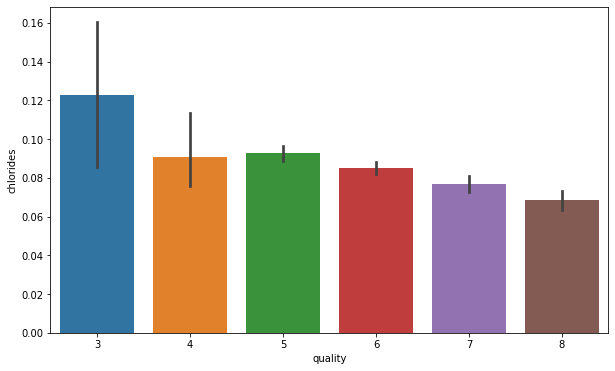

In [ ]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

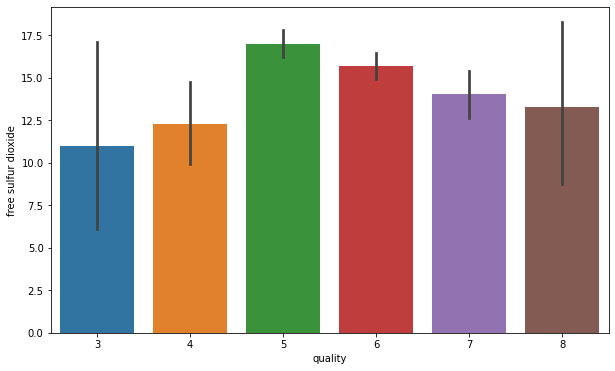

In [ ]:
#Here we can see there is a rising trend of free sulfur dioxide in the middle with quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

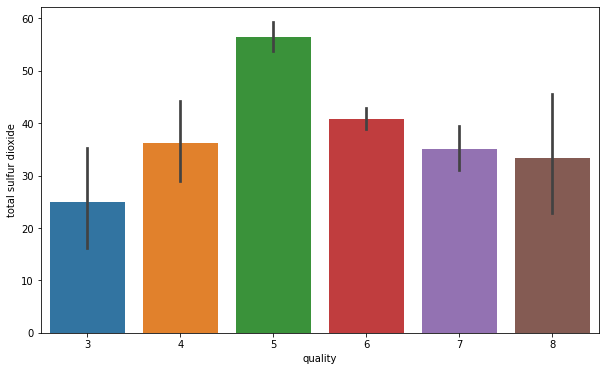

In [ ]:
#Here we can see there is a rising trend of free total sulfur dioxide in the middle with quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

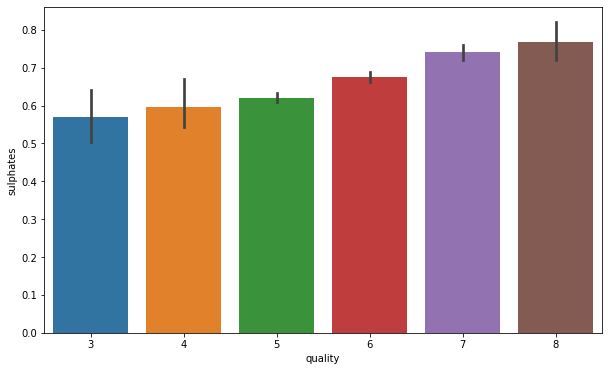

In [ ]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

# **Data Preprocessing**

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [ ]:
#Bad becomes 0 and good becomes 1 
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

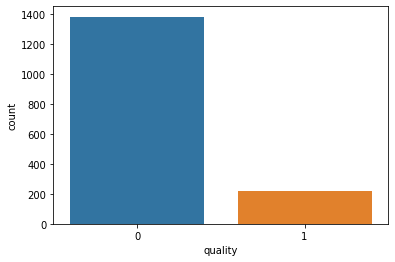

In [ ]:
sns.countplot(wine['quality'])

# **Splitting data into train and test**

In [ ]:
#Splitting into x and y
x=wine.iloc[:,:-1].values
y=wine.iloc[:,-1].values

In [ ]:
#splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train)

[[ 8.7   0.69  0.31 ...  3.48  0.74 11.6 ]
 [ 6.1   0.21  0.4  ...  3.25  0.59 11.9 ]
 [10.9   0.39  0.47 ...  3.3   0.75  9.8 ]
 ...
 [ 7.2   0.62  0.06 ...  3.51  0.54  9.5 ]
 [ 7.9   0.2   0.35 ...  3.32  0.8  11.9 ]
 [ 5.8   0.29  0.26 ...  3.39  0.54 13.5 ]]


In [ ]:
print(y_train)

[0 0 0 ... 0 1 0]


**Feature Scaling**

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# **Training Modelling**

**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.70      0.40      0.51        47

    accuracy                           0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320



89 % accuracy using RFC

In [ ]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 28  19]]


**Stochastic Gradient Descent Classifier**

In [ ]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       273
           1       0.51      0.57      0.54        47

    accuracy                           0.86       320
   macro avg       0.72      0.74      0.73       320
weighted avg       0.86      0.86      0.86       320



86 % accuracy using SGD

In [ ]:
print(confusion_matrix(y_test, pred_sgd))


[[247  26]
 [ 20  27]]


**Support Vector Classifier**

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



88 % accuracy using SVC

# **Increasing Model Accuracy**

**Grid Search for SVC**

In [ ]:
#Finding best parameters for our SVC model
param={
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear','rbf'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc=GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [ ]:
#Let's run our SVC again with the best parameters.
svc2=SVC(C=1.2, gamma=0.9, kernel='rbf')
svc2.fit(x_train, y_train)
pred_svc2=svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



Accuracy of SVC increased from 88 % to 90 %

**Grid Search for RFC**

In [ ]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}
# create random forest classifier model
rf_model = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv=5)

# train the grid search meta-estimator to find the best model
model = clf.fit(x_train, y_train)



In [ ]:
model.best_params_

{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 250}

In [ ]:
#running RFC with best parameters
rfc = RandomForestClassifier(n_estimators=250, min_samples_split=2, max_features = 'sqrt')
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.71      0.43      0.53        47

    accuracy                           0.89       320
   macro avg       0.81      0.70      0.74       320
weighted avg       0.88      0.89      0.88       320



There is no increment in RFC accuracy

So, in this case the winner is SVC with 90% accuracy